In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # accuracy metric
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
diabetes=load_diabetes()
df_diabetes = sklearn_to_df(diabetes)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
df_diabetes=df_diabetes.drop(['s1','s2','s3','s4','s5','s6'],axis=1)
X=df_diabetes.drop(['target'],axis=1)
y=df_diabetes['target']
X.head()

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005671
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 22}

In [14]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred,squared=False) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 93.8785373516274
RMSE value for k=  2 is: 77.74544316282639
RMSE value for k=  3 is: 77.03041051960567
RMSE value for k=  4 is: 69.08246984908283
RMSE value for k=  5 is: 65.21783033234414
RMSE value for k=  6 is: 64.07804084358432
RMSE value for k=  7 is: 65.32495984195924
RMSE value for k=  8 is: 64.44558827658109
RMSE value for k=  9 is: 62.7018399886832
RMSE value for k=  10 is: 62.32218570830675
RMSE value for k=  11 is: 62.41901727159025
RMSE value for k=  12 is: 61.127568788906096
RMSE value for k=  13 is: 61.20789129720716
RMSE value for k=  14 is: 60.587544514796875
RMSE value for k=  15 is: 61.073665022666475
RMSE value for k=  16 is: 60.662009799671104
RMSE value for k=  17 is: 60.22665611601334
RMSE value for k=  18 is: 60.51098790610453
RMSE value for k=  19 is: 60.02200204557464
RMSE value for k=  20 is: 59.3927690147206
RMSE value for k=  21 is: 59.76168839850073
RMSE value for k=  22 is: 59.29239476431494
RMSE value for k=  23 is: 59.49311637231

<AxesSubplot:>

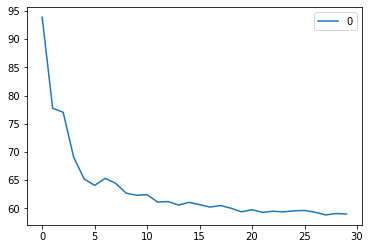

In [15]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [16]:
knn = KNeighborsRegressor(n_neighbors=22)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=22)

In [17]:
y_pred=knn.predict(X_test)

In [18]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 48.72012257405516
Mean Squared Error (MSE) : 3515.5880768873617
Root Mean Squared Error (RMSE) : 59.29239476431494
Mean Absolute Percentage Error (MAPE) : 0.40119020150306717
